## Differential Equations

### Solving SIR Model
More details can be seen in

[Getting Started with Differential Equations in Julia · DifferentialEquations.jl](https://docs.sciml.ai/DiffEqDocs/stable/getting_started/)

[SciML/DifferentialEquations.jl: Multi-language suite for high-performance solvers of differential equations and scientific machine learning (SciML) components. Ordinary differential equations (ODEs), stochastic differential equations (SDEs), delay differential equations (DDEs), differential-algebraic equations (DAEs), and more in Julia.](https://github.com/SciML/DifferentialEquations.jl)

## IMPORTANT: Activate Julia environment first

In [35]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Desktop/MyProjects/Julia_Tutorial_on_AI4MathBiology`


### Learn Julia in AI era

Actually, you can also use [Cursor - The AI-first Code Editor](https://cursor.sh/) (VSCode with ChatGPT embedded.)


In [36]:
using DifferentialEquations
function sir!(du,u,p,t)
    S,I,R = u
    β,γ = p
    du[1] = -β*S*I
    du[2] = β*S*I-γ*I
    du[3] = γ*I
end
parms = [0.1,0.05]
initialvalue = [0.99,0.01,0.0]
tspan = (0.0,200.0)
sir_prob = ODEProblem(sir!,initialvalue,tspan,parms)
sir_sol = solve(sir_prob,saveat = 0.1);

### Data visulization

In Julia, we use `Plots.jl` or `Makie.jl` or `TidierPlots.jl`(similar to `ggplot2`)

- [Plots.jl](https://docs.juliaplots.org/stable/)

- [Makie.jl](https://docs.makie.org/stable/)

- [TidierOrg/TidierPlots.jl: Tidier data visualization in Julia, modeled after the ggplot2 R package.](https://github.com/TidierOrg/TidierPlots.jl)

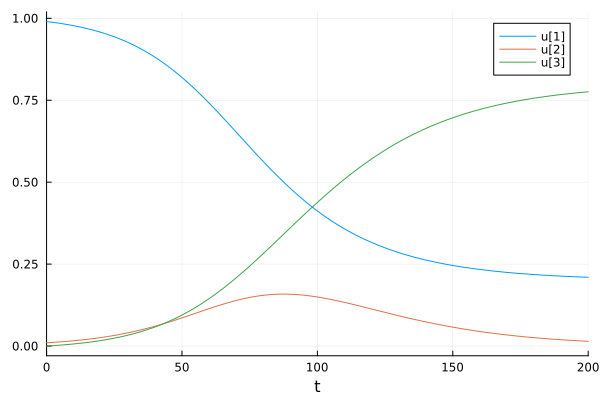

In [37]:
using Plots
plot(sir_sol)

## Solving SIR model with neural networks embedded
Solving the following differential equations with neural networks embedded
$$
	\left\{
	\begin{aligned}
		 & \frac{\mathrm{d}S}{\mathrm{dt}} = - \mathrm{NN}(I) S ,        \\
		 & \frac{\mathrm{d}I}{\mathrm{dt}} = \mathrm{NN}(I) S- \gamma I,
	\end{aligned}
	\right.
$$

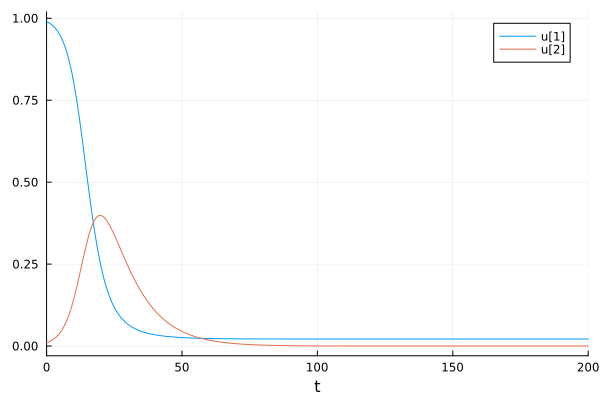

In [38]:
using DifferentialEquations
using Flux
using Plots
ann_node = Flux.Chain(Flux.Dense(1, 64, tanh), Flux.Dense(64, 1))
para, re = Flux.destructure(ann_node) # destructure
function SIR_nn(du,u,p,t)
    S, I = u
    du[1] =  - S*re(p)([I])[1]
    du[2] = S*re(p)([I])[1] - 0.1*I
end
initialvalue = Float32.([0.99,0.01])
tspan = (0.0f0,200.0f0)
prob_nn = ODEProblem(SIR_nn, initialvalue, tspan, para)
sol_nn=solve(prob_nn)
plot(sol_nn)